In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('processed_data/five_summary.csv')

In [4]:
df

,min_x,min_y,min_z,25%_x,25%_y,25%_z,50%_x,50%_y,50%_z,75%_x,...,75%_z,max_x,max_y,max_z,mean_x,mean_y,mean_z,machine,process_name,label
0,-2008.0,-50.0,-9.0,35.0,2004.0,-5.025476,-1774.0,-39.0,39.0,91.0,...,32.631773,-1663.0,-1116.0,-1015.0,-917.0,-316.0,-1015.094961,M01,OP00,good
1,-1940.0,-58.0,-9.0,46.0,2246.0,-4.080831,-1887.0,-50.0,27.0,126.0,...,34.439658,-1795.0,-1098.0,-1036.0,-921.0,-220.0,-1014.888903,M01,OP00,good
2,-2039.0,-64.0,-11.0,50.0,2024.0,-5.624304,-1973.0,-44.0,31.0,103.0,...,30.928157,-2106.0,-1149.0,-989.0,-894.0,-302.0,-1013.841030,M01,OP00,good
3,-2006.0,-56.0,-7.0,40.0,2221.0,-4.051225,-1870.0,-35.0,37.0,87.0,...,32.504339,-1651.0,-1093.0,-1028.0,-931.0,-312.0,-1014.980279,M01,OP00,good
4,-2012.0,-58.0,-9.0,46.0,2252.0,-3.874870,-1868.0,-54.0,27.0,128.0,...,34.393633,-1786.0,-1097.0,-1036.0,-921.0,-152.0,-1014.514865,M01,OP00,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,-2295.0,-52.0,15.0,70.0,2324.0,9.344506,-2764.0,-58.0,17.0,99.0,...,18.193375,-2209.0,-1054.0,-1022.0,-989.0,167.0,-1022.487604,M03,OP13,good
1698,-4475.0,-76.0,19.0,91.0,4003.0,10.851487,-2996.0,-39.0,17.0,80.0,...,18.011073,-3822.0,-1069.0,-1020.0,-972.0,974.0,-1019.704778,M03,OP13,good
1699,-1950.0,-11.0,17.0,40.0,2317.0,12.888480,-2010.0,-25.0,17.0,64.5,...,18.039479,-2201.0,-1048.0,-1020.0,-995.0,247.0,-1020.280482,M03,OP13,good
1700,-1979.0,-50.0,15.0,68.0,2026.0,10.101450,-1606.0,-48.0,17.0,89.0,...,19.248543,-2127.0,-1059.0,-1022.0,-981.0,-70.0,-1020.916288,M03,OP13,good


In [5]:
df

,min_x,min_y,min_z,25%_x,25%_y,25%_z,50%_x,50%_y,50%_z,75%_x,...,75%_z,max_x,max_y,max_z,mean_x,mean_y,mean_z,machine,process_name,label
0,-2008.0,-50.0,-9.0,35.0,2004.0,-5.025476,-1774.0,-39.0,39.0,91.0,...,32.631773,-1663.0,-1116.0,-1015.0,-917.0,-316.0,-1015.094961,M01,OP00,good
1,-1940.0,-58.0,-9.0,46.0,2246.0,-4.080831,-1887.0,-50.0,27.0,126.0,...,34.439658,-1795.0,-1098.0,-1036.0,-921.0,-220.0,-1014.888903,M01,OP00,good
2,-2039.0,-64.0,-11.0,50.0,2024.0,-5.624304,-1973.0,-44.0,31.0,103.0,...,30.928157,-2106.0,-1149.0,-989.0,-894.0,-302.0,-1013.841030,M01,OP00,good
3,-2006.0,-56.0,-7.0,40.0,2221.0,-4.051225,-1870.0,-35.0,37.0,87.0,...,32.504339,-1651.0,-1093.0,-1028.0,-931.0,-312.0,-1014.980279,M01,OP00,good
4,-2012.0,-58.0,-9.0,46.0,2252.0,-3.874870,-1868.0,-54.0,27.0,128.0,...,34.393633,-1786.0,-1097.0,-1036.0,-921.0,-152.0,-1014.514865,M01,OP00,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,-2295.0,-52.0,15.0,70.0,2324.0,9.344506,-2764.0,-58.0,17.0,99.0,...,18.193375,-2209.0,-1054.0,-1022.0,-989.0,167.0,-1022.487604,M03,OP13,good
1698,-4475.0,-76.0,19.0,91.0,4003.0,10.851487,-2996.0,-39.0,17.0,80.0,...,18.011073,-3822.0,-1069.0,-1020.0,-972.0,974.0,-1019.704778,M03,OP13,good
1699,-1950.0,-11.0,17.0,40.0,2317.0,12.888480,-2010.0,-25.0,17.0,64.5,...,18.039479,-2201.0,-1048.0,-1020.0,-995.0,247.0,-1020.280482,M03,OP13,good
1700,-1979.0,-50.0,15.0,68.0,2026.0,10.101450,-1606.0,-48.0,17.0,89.0,...,19.248543,-2127.0,-1059.0,-1022.0,-981.0,-70.0,-1020.916288,M03,OP13,good


In [6]:
# Selecting only the columns representing accelerometer measurements
X = df.drop(['machine', 'process_name', 'label'], axis=1)

# Assuming 'label' contains your labels
y = df[['machine', 'process_name','label']]

# Standardize the features
X_standardized = (X - X.mean()) / X.std()

In [7]:
# PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_standardized)

# Creating a DataFrame for the reduced data
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Concatenating the labels with the reduced data
final_df = pd.concat([principal_df, y], axis=1)



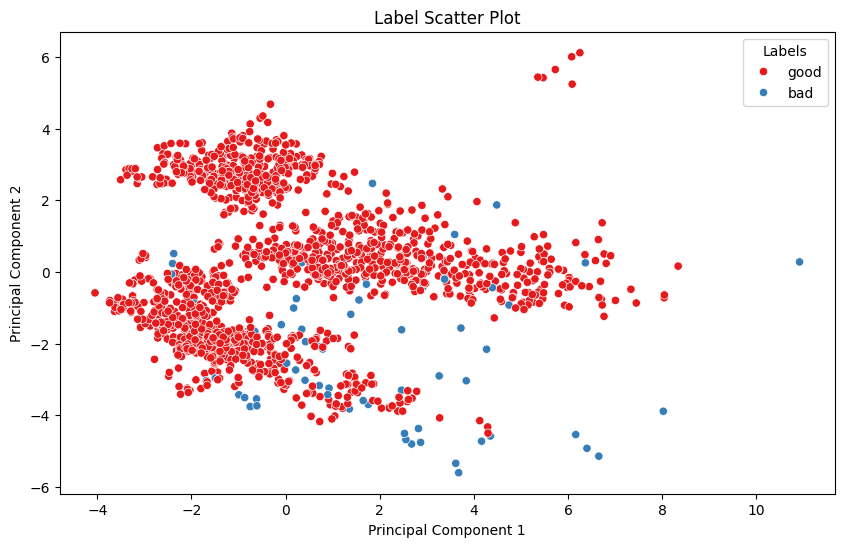

In [8]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_df, x='PC1', y='PC2', hue='label', palette='Set1')
plt.title('Label Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Labels')
plt.show()

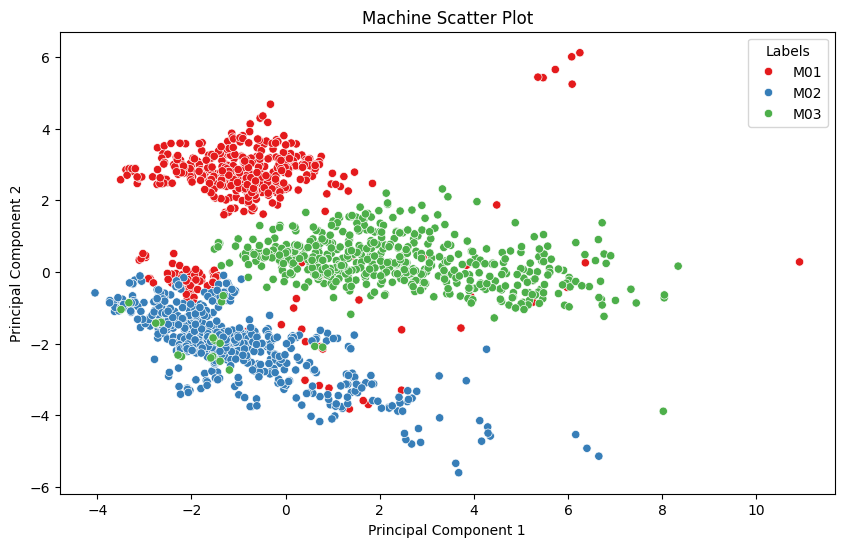

In [9]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_df, x='PC1', y='PC2', hue='machine', palette='Set1')
plt.title('Machine Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Labels')
plt.show()